Let's look at Titanic

In [1]:
#import numpy
#import matplotlib
#import sklearn
import pandas as pd

# Load the training, test data
train_data = pd.read_csv('~/Documents/python/projects/Kaggle/Titanic/Data/train.csv')
#test_data = pd.read_csv('~/Documents/python/projects/Kaggle/Titanic/Data/test.csv')

# Display the first few rows of the data
display(train_data.head())
#display(test_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Get a summary of the data
display(train_data.info())

# Get basic statistics for the numeric columns in the data
#display(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None

In [3]:
# Get the number of unique values in the "Survived" column of the training data
#display(train_data['Survived'].value_counts())

# Get the number of missing values in each column of the training data
display(train_data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# Add a Survived column to the test dataframe and fill it with NaN values
test_data['Survived'] = float('nan')

# Combine the training and test dataframes into a single dataframe
data_df = pd.concat([train_data, test_data], ignore_index=True)

# Verify that the combined dataframe has the expected number of rows and columns
print(data_df.shape)
# Inspect the new dataframe
display(data_df.head())
display(data_df.tail())


NameError: name 'test_data' is not defined

In [ ]:
# Check for missing values
print(data_df.isnull().sum())

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [ ]:
# Calculate the median age
median_age = train_data['Age'].median()

# Replace missing values in the Age column with the median age
train_data['Age'].fillna(median_age, inplace=True)
test_data['Age'].fillna(median_age, inplace=True)

# Drop the Cabin column
train_data.drop('Cabin', axis=1, inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

In [ ]:
display(train_data.describe())
display(test_data.describe())

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000,0.0
mean,1100.500000,2.265550,29.805024,0.447368,0.392344,35.627188,NaN
std,120.810458,0.841838,12.667969,0.896760,0.981429,55.907576,NaN
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,NaN
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800,NaN
50%,1100.500000,3.000000,28.000000,0.000000,0.000000,14.454200,NaN
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000,NaN
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,NaN


In [ ]:
# Count the number of passengers in each class
class_counts = train_data['Pclass'].value_counts()

# Print the result
display(class_counts)


3    491
1    216
2    184
Name: Pclass, dtype: int64

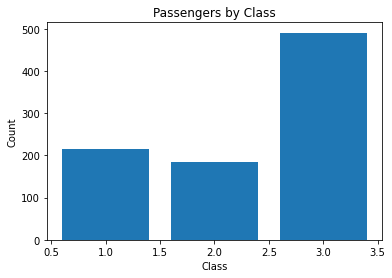

In [ ]:
import matplotlib.pyplot as plt

# Count the number of passengers in each class
# class_counts = train_data['Pclass'].value_counts()

# Create a bar chart of class counts
plt.bar(class_counts.index, class_counts.values)

# Add a title and labels to the chart
plt.title('Passengers by Class')
plt.xlabel('Class')
plt.ylabel('Count')

# Show the chart
plt.show()


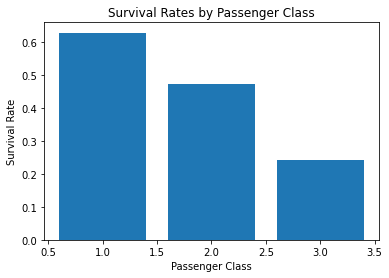

In [ ]:
import matplotlib.pyplot as plt

# Count the number of passengers in each class
class_counts = train_data['Pclass'].value_counts()

# Count the number of survivors in each class
survival_counts = train_data.groupby('Pclass')['Survived'].sum()

# Calculate the survival rates for each class
survival_rates = survival_counts / class_counts

# Create a bar chart
plt.bar(survival_rates.index, survival_rates.values)

# Add a title and axis labels
plt.title('Survival Rates by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')

# Show the chart
plt.show()


In [ ]:
display(survival_rates)

1    0.629630
2    0.472826
3    0.242363
dtype: float64

In [ ]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1
display(train_data)
display(test_data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,FamilySize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,NaN,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,NaN,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,NaN,3
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,S,NaN,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,NaN,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,NaN,1
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,S,NaN,1


In [ ]:
import re

def extract_title(name):
    match = re.search(r'\b(\w+)\.', name)
    if match:
        return match.group(1)
    else:
        return ''

train_data['Title'] = train_data['Name'].apply(extract_title)
test_data['Title'] = test_data['Name'].apply(extract_title)
display(train_data)
display(test_data)
# train_data['Title'].unique()
# print(train_data['Title'].value_counts())


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S,4,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,Mr


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Survived,FamilySize,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,NaN,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,NaN,2,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,NaN,1,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,NaN,1,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,NaN,3,Mrs
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8.0500,S,NaN,1,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C,NaN,1,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S,NaN,1,Mr
416,1308,3,"Ware, Mr. Frederick",male,28.0,0,0,359309,8.0500,S,NaN,1,Mr


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numerical variables
label_encoder = LabelEncoder()
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])
train_data['Embarked'] = train_data['Embarked'].fillna('Unknown')
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])
test_data['Sex'] = label_encoder.fit_transform(test_data['Sex'])
test_data['Embarked'] = test_data['Embarked'].fillna('Unknown')
test_data['Embarked'] = label_encoder.fit_transform(test_data['Embarked'])
train_data['Title'] = label_encoder.fit_transform(train_data['Title'])
test_data['Title'] = label_encoder.fit_transform(test_data['Title'])

# Split the data into training and testing sets
X = train_data.drop(['Survived', 'Name', 'Ticket'], axis=1)
y = train_data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train the model using liblinear
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(model.coef_)

Accuracy: 0.7877094972067039
[[ 1.70750518e-04 -7.70646864e-01 -2.40867348e+00 -2.94310966e-02
  -1.26274392e+00 -9.61291118e-01  3.73407797e-03 -7.76731282e-02
   9.29080987e-01 -3.38098490e-02]]


In [ ]:
# Create a DataFrame with feature names and coefficients
coef_df = pd.DataFrame({'feature': X_train.columns, 'coefficient': model.coef_[0]})

# Print the DataFrame sorted by coefficient value
print(coef_df.sort_values(by='coefficient', ascending=False))

       feature  coefficient
8   FamilySize     0.929081
6         Fare     0.003734
0  PassengerId     0.000171
3          Age    -0.029431
9        Title    -0.033810
7     Embarked    -0.077673
1       Pclass    -0.770647
5        Parch    -0.961291
4        SibSp    -1.262744
2          Sex    -2.408673


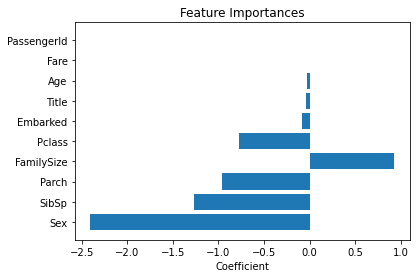

In [ ]:
import matplotlib.pyplot as plt

# Get the coefficients and feature names
coefs = model.coef_[0]
features = X_train.columns

# Create a dictionary of feature names and their corresponding coefficients
coef_dict = dict(zip(features, coefs))

# Sort the dictionary by absolute coefficient value
coef_dict = dict(sorted(coef_dict.items(), key=lambda x: abs(x[1]), reverse=True))

# Create a bar chart of feature importances
plt.barh(range(len(coef_dict)), list(coef_dict.values()), align='center')
plt.yticks(range(len(coef_dict)), list(coef_dict.keys()))
plt.xlabel('Coefficient')
plt.title('Feature Importances')    
plt.show()
